# Homework 2 - Forest Fire


In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
import numpy 
import pylab 
import random 
import matplotlib
import seaborn as sns
import matplotlib.patches as mpatches

## Exercise 1

<IPython.core.display.Javascript object>


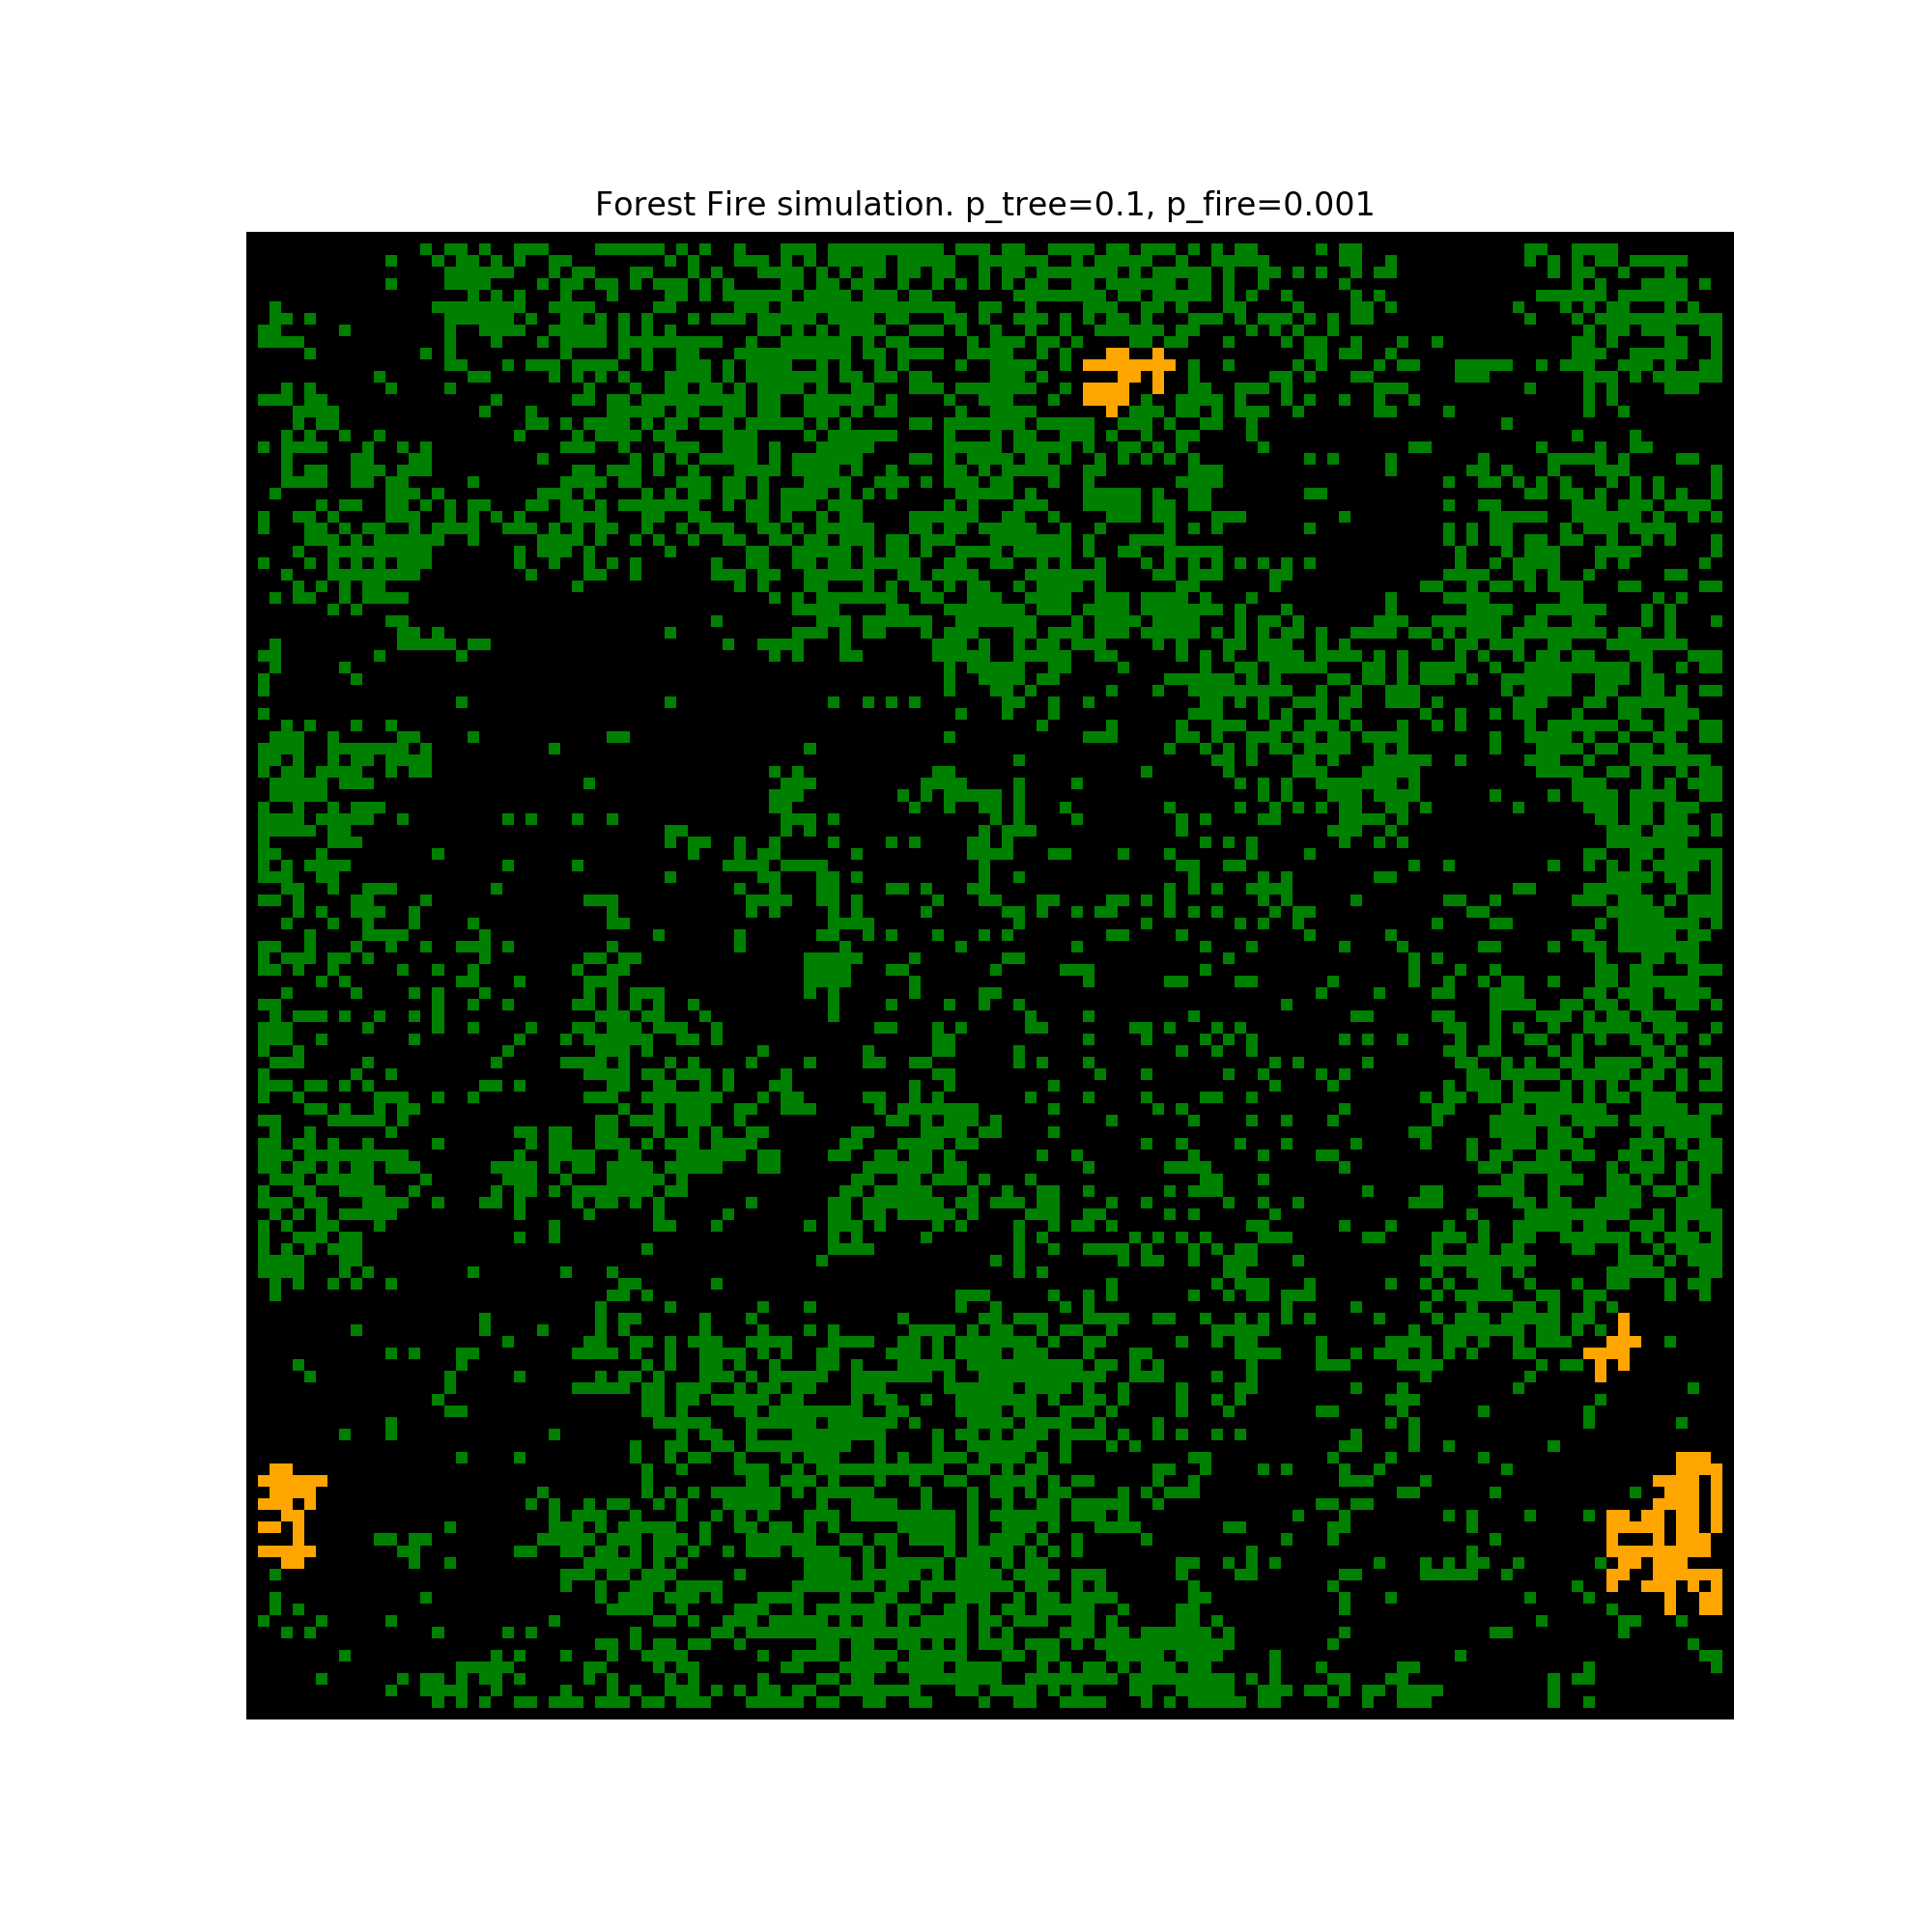

In [3]:

def iteration(forest, p_tree, p_fire):
    """
    Creates the next forest configuration. Here the fire is spreading one "tree-cluster" at an instance.
    """
    temp_forest = np.zeros((N, N))
    new_forest = forest.copy()
    
    for ix in range(1, N-1):
        for iy in range(1, N-1):
            
            rand1 = np.random.random(1)
            if forest[ix,iy] == empty and rand1 < p_tree:
                temp_forest[ix,iy] = tree
            
            if forest[ix,iy] == tree:
                temp_forest[ix,iy] = tree   
                
                rand2 = np.random.random(1)
                if rand2 < p_fire:
                    temp_forest[ix,iy] = fire
            
   # Fire spreading to all neighbouring trees         
    while np.any(new_forest != temp_forest):
        new_forest = temp_forest.copy()
        
        for ix in range(1, N-1):
            for iy in range(1, N-1):
                
                #Check the edges for periodic boundary condition
                if ix==N-2 and temp_forest[ix,iy]==tree:
                    if temp_forest[1, iy] == fire:
                            temp_forest[ix,iy] = fire
                    
                if iy==N-2 and temp_forest[ix,iy]==tree:
                    if temp_forest[ix, 1] == fire:
                            temp_forest[ix,iy] = fire
                
                if ix==1 and temp_forest[ix,iy]==tree:
                    if temp_forest[N-2, iy] == fire:
                            temp_forest[ix,iy] = fire
                    
                if iy==1 and temp_forest[ix,iy]==tree:
                    if temp_forest[ix, N-2] == fire:
                            temp_forest[ix,iy] = fire
                
                # Checking all neighbours for potential spreading of fire    
                if temp_forest[ix,iy] == tree:
                    for dx,dy in neighbourhood:
                        if temp_forest[ix+dx, iy+dy] == fire:
                            temp_forest[ix,iy] = fire
           
    return new_forest       

def animate(i):
    # The animation function. The function is called on and produces one frame for every iteration.
    im.set_data(animate.forest)
    animate.forest = iteration(animate.forest, p_tree, p_fire)
    
# Script for exercise 1
N = 128
forest = np.zeros((N,N))
neighbourhood = ((1,0),(-1,0),(0,1),(0,-1))
p_tree = 0.1
p_fire = 0.001
initial_proportion_trees = 0.3
empty, tree, fire = 0,1,2

colors_list = ['black', 'green', 'green', 'orange']
cmap = colors.ListedColormap(colors_list)

bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)


# Initialize the forest
number_trees = int(initial_proportion_trees*N**2)

initial_trees_index = np.random.randint(1,N-1,size=(2,number_trees))
for t1, t2 in zip(initial_trees_index[0], initial_trees_index[1]):
    forest[t1][t2] = tree
    
# Making the plot    
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(forest, cmap=cmap, norm=norm)#, interpolation='nearest')
ax.set_title(f'Forest Fire simulation. p_tree={p_tree}, p_fire={p_fire} ')

# Bind our grid to the identifier X in the animate function's namespace.
animate.forest = forest

# Interval between frames (ms).
interval = 100
animate_forest_fire = animation.FuncAnimation(fig, animate, interval=interval)


plt.show()

## Exercise 2

In [ ]:
def random_one_fire(forest, p_fire):

    temp_forest = np.zeros((N, N))
    new_forest = forest.copy()
    
    for ix in range(1, N-1):
        for iy in range(1, N-1):
            
            if forest[ix,iy] == tree:
                temp_forest[ix,iy] = tree  
                
    fire_index = np.random.randint(1,N,2)
    temp_forest[fire_index[0], fire_index[1]] = fire
                
   # Fire spreading to all neighbouring trees         
    while np.any(new_forest != temp_forest):
        new_forest = temp_forest.copy()
        
        for ix in range(1, N-1):
            for iy in range(1, N-1):
                
                #Check the edges for periodic boundary condition
                if ix==N-2 and temp_forest[ix,iy]==tree:
                    if temp_forest[1, iy] == fire:
                            temp_forest[ix,iy] = fire
                    
                if iy==N-2 and temp_forest[ix,iy]==tree:
                    if temp_forest[ix, 1] == fire:
                            temp_forest[ix,iy] = fire
                
                if ix==1 and temp_forest[ix,iy]==tree:
                    if temp_forest[N-2, iy] == fire:
                            temp_forest[ix,iy] = fire
                    
                if iy==1 and temp_forest[ix,iy]==tree:
                    if temp_forest[ix, N-2] == fire:
                            temp_forest[ix,iy] = fire
                
                # Checking all neighbours for potential spreading of fire    
                if temp_forest[ix,iy] == tree:
                    for dx,dy in neighbourhood:
                        if temp_forest[ix+dx, iy+dy] == fire:
                            temp_forest[ix,iy] = fire
   
    proportion_fire = np.sum(new_forest==fire)/((N-2)**2)
    
    return proportion_fire       

def one_forest_fire(forest,p_fire, p_tree):

    temp_forest = np.zeros((N, N))
    new_forest = forest.copy()
    
    for ix in range(1, N-1):
        for iy in range(1, N-1):
            
            rand1 = np.random.random(1)
            if forest[ix,iy] == empty and rand1 < p_tree:
                temp_forest[ix,iy] = tree
            
            if forest[ix,iy] == tree:
                temp_forest[ix,iy] = tree  
                   
    density_tree = np.sum(temp_forest==tree)/((N-2)**2) 

    #If only one fire:
    fire_index = np.random.randint(1,N,2)
    temp_forest[fire_index[0], fire_index[1]] = fire
        
   # Fire spreading to all neighbouring trees         
    while np.any(new_forest != temp_forest):
        new_forest = temp_forest.copy()
        
        for ix in range(1, N-1):
            for iy in range(1, N-1):
                
                #Check the edges for periodic boundary condition
                if ix==N-2 and temp_forest[ix,iy]==tree:
                    if temp_forest[1, iy] == fire:
                            temp_forest[ix,iy] = fire
                    
                if iy==N-2 and temp_forest[ix,iy]==tree:
                    if temp_forest[ix, 1] == fire:
                            temp_forest[ix,iy] = fire
                
                if ix==1 and temp_forest[ix,iy]==tree:
                    if temp_forest[N-2, iy] == fire:
                            temp_forest[ix,iy] = fire
                    
                if iy==1 and temp_forest[ix,iy]==tree:
                    if temp_forest[ix, N-2] == fire:
                            temp_forest[ix,iy] = fire
                
                # Checking all neighbours for potential spreading of fire    
                if temp_forest[ix,iy] == tree:
                    for dx,dy in neighbourhood:
                        if temp_forest[ix+dx, iy+dy] == fire:
                            temp_forest[ix,iy] = fire
    
    proportion_fire = np.sum(temp_forest==fire)/((N-2)**2)
    
    return new_forest, density_tree, proportion_fire     


    
# Script for exercise 2
N = 128
forest = np.zeros((N,N))
neighbourhood = ((1,0),(-1,0),(0,1),(0,-1))

initial_proportion_trees = 0.3
p_tree = 0.1
p_fire = 0.001
empty, tree, fire = 0,1,2

colors_list = ['black', 'green', 'green', 'orange']
cmap = colors.ListedColormap(colors_list)

#What does this bounds, norm and boundary norm do????
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)


# Initialize the forest
number_trees = int(initial_proportion_trees*N**2)

initial_trees_index = np.random.randint(1,N-1,size=(2,number_trees))
for t1, t2 in zip(initial_trees_index[0], initial_trees_index[1]):
    forest[t1][t2] = tree

prop_fire_generated_forest = []
prop_fire_random_forest = []

generated_forest = forest

for i in range(400):
    
    generated_forest_output = one_forest_fire(generated_forest, p_fire, p_tree)
    
    generated_forest = generated_forest_output[0]
    density_tree = generated_forest_output[1]
    prop_fire_generated_forest.append(generated_forest_output[2])
    
    
    # initialize a new random forest for every iteration
    number_trees = int(density_tree*N**2)
    forest = np.zeros((N,N))
    
    initial_trees_index = np.random.randint(1,N-1,size=(2,number_trees))
    for t1, t2 in zip(initial_trees_index[0], initial_trees_index[1]):
        forest[t1][t2] = tree
        
    prop_fire_random_forest.append(random_one_fire(forest, p_fire))


In [ ]:
#Creating the cCDF plot

prop_fire_generated_forest = np.flip(np.sort(prop_fire_generated_forest))
sum_all_generated = np.sum(prop_fire_generated_forest)
generated_normalized = prop_fire_generated_forest/sum_all_generated

cdf_vector_generated= np.arange(len(prop_fire_generated_forest))/len(prop_fire_generated_forest)

prop_fire_random_forest = np.flip(np.sort(prop_fire_random_forest))
sum_all_random = np.sum(prop_fire_random_forest)
random_normalized = prop_fire_random_forest/sum_all_random

# Creates the cdf vector for random forest
cdf_vector_random = []
cdf_random = 0
for i in random_normalized:
    cdf_random += i
    cdf_vector_random.append(cdf_random)
    
cdf_vector_random = np.arange(len(prop_fire_generated_forest))/len(prop_fire_generated_forest)

#Plot figure
figur = plt.figure()
ax = figur.add_axes([0.1,0.1,.8,.8])
ax.loglog(prop_fire_random_forest, cdf_vector_random, label = 'Random forest')
ax.loglog(prop_fire_generated_forest, cdf_vector_generated, label = 'Simulated forest')
ax.set_xlabel('Relative fire size')
ax.set_ylabel('cCDF')
ax.set_title(f'Rank-frequency plot. p_tree={p_tree}, p_fire={p_fire} ')
plt.legend(loc='best')

## Exercise 3

<IPython.core.display.Javascript object>


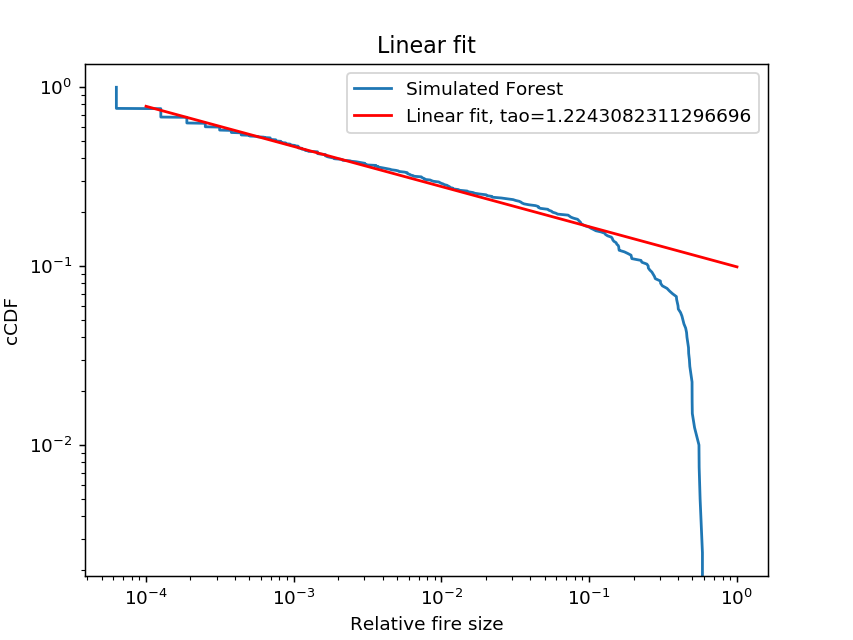

In [23]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

forest = 'Simulated Forest'
x_values_full=prop_fire_generated_forest
y_values_full=cdf_vector_generated
x_values = x_values_full[50:399]
y_values = y_values_full[50:399]

def func(x,slope,b):
    return x**slope*np.exp(b)

x=np.linspace(10e-5,1,len(x_values))
y = func(x, -0.15, 1)


popt, pcov = curve_fit(func, x_values, y_values)
popt

figur = plt.figure()
ax = figur.add_axes([0.1,0.1,.8,.8])


plt.loglog(x_values_full, y_values_full, label = forest)
plt.loglog(x, func(x, *popt), 'r-',
         label=f'Linear fit, tao={1-popt[0]}')#label=' 1-tao=%5.3f, intersect=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, x, y)
popt

plt.xlabel('Relative fire size')
plt.ylabel('cCDF')
plt.title(f'Linear fit')
plt.legend()

plt.show()

tao = 1 - popt[0]

# Synthetic power law data

<IPython.core.display.Javascript object>


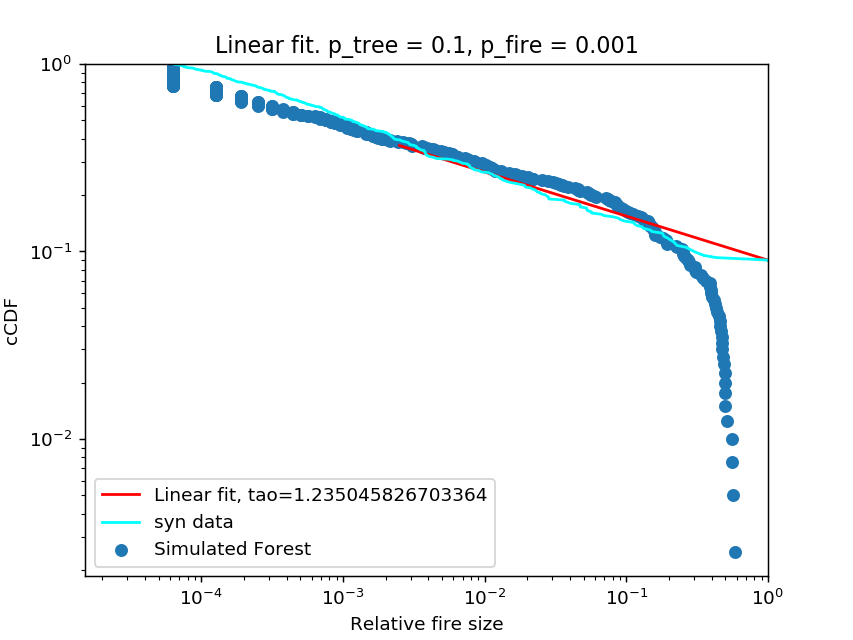

/Users/emmarydholm/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/emmarydholm/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


In [28]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

forest = 'Simulated Forest'
x_values_full=prop_fire_generated_forest
y_values_full=cdf_vector_generated
x_values = x_values_full #[50:399]
y_values = y_values_full #[50:399]

def func(x,slope,b):
    return x**slope*np.exp(b)

x=np.linspace(1/len(x_values),1,len(x_values))
y = func(x, -0.15, 1)


popt, pcov = curve_fit(func, x_values, y_values)
popt

figur = plt.figure()
ax = figur.add_axes([0.1,0.1,.8,.8])


plt.scatter(x_values_full, y_values_full, label = forest)
plt.loglog(x, func(x, *popt), 'r-',
         label=f'Linear fit, tao={1-popt[0]}')#label=' 1-tao=%5.3f, intersect=%5.3f' % tuple(popt))

#popt, pcov = curve_fit(func, x, y)
#popt

plt.xlabel('Relative fire size')
plt.ylabel('cCDF')
plt.title(f'Linear fit')
plt.legend()

plt.show()

tao = 1 - popt[0]

# Create the syntetic dataset
tao = 1 - popt[0]
rand_vector = np.sort(np.random.random(400))
x_min = 1#min(prop_fire_random_forest)
y_syn = np.linspace(0,1,len(rand_vector))

cCDF_syn =  x_min*(1-rand_vector)**(-1/(tao-1))
cCDF_syn = np.flip(cCDF_syn)/(126*126)

plt.loglog(cCDF_syn, y_syn, c='cyan' ,label='syn data')

plt.xlabel('Relative fire size')
plt.ylabel('cCDF')
plt.title(f'Linear fit. p_tree = {p_tree}, p_fire = {p_fire}')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.legend()
plt.show()